In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('motion_data.csv', encoding='latin-1')

In [6]:
data

,Second 1 X,Second 1 Y,Second 1 Z,Second 2 X,Second 2 Y,Second 2 Z,Second 3 X,Second 3 Y,Second 3 Z,Second 4 X,...,Second 8 X,Second 8 Y,Second 8 Z,Second 9 X,Second 9 Y,Second 9 Z,Second 10 X,Second 10 Y,Second 10 Z,animal
0,-0.634463,9.023746,-3.019088,-1.204283,9.153033,-1.968034,-0.251391,9.591172,-2.185906,0.162806,...,2.789245,7.103596,-2.454057,3.773262,4.639963,-2.932897,7.862558,-3.375824,-0.548272,Elephant
1,-0.639252,8.276755,-4.752491,-0.696713,8.489840,-4.616021,-0.203507,8.767567,-5.544971,2.717419,...,-3.483563,2.082955,0.222661,-17.420212,-32.228348,20.621260,6.964733,-2.442086,3.287239,Elephant
2,1.501164,6.572083,6.239290,2.250550,5.635951,7.678205,2.473210,5.398925,7.572860,2.434903,...,3.801992,4.177882,8.889671,1.508347,6.854599,7.108385,6.294356,7.141904,7.678205,Elephant
3,-1.984793,2.090138,9.205706,-2.097321,2.018312,9.844957,-2.252944,1.661576,9.701305,-3.926491,...,-6.916849,6.246472,9.354146,-8.765172,4.893748,14.192827,-9.593566,-3.703830,6.279991,Elephant
4,1.630451,4.144363,8.597578,1.484405,4.343082,8.552089,0.636858,4.209007,8.755595,0.584185,...,0.766145,3.476381,8.980651,0.708684,3.450045,9.325416,0.758962,3.555390,8.880095,Elephant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.112527,0.148441,9.684546,-0.052672,0.131681,9.677363,0.524330,-0.107739,11.008539,-11.590330,...,-1.503559,-3.962404,-0.153229,-0.526724,-4.125209,0.110133,-2.116474,-4.857835,4.836287,Wild_Boar
145,2.422932,-1.431733,11.145009,6.904878,1.388637,20.894197,-2.145205,-2.547431,6.112397,-0.169988,...,0.119710,-2.281674,0.031125,13.529634,-14.094666,3.991134,0.280122,-0.550666,0.330400,Wild_Boar
146,0.076614,-0.107739,9.794679,-0.043096,-0.081403,9.765948,0.301669,-0.014365,9.660604,-3.505111,...,-2.820370,-12.090718,-0.114922,-2.712631,-12.018892,-0.134075,5.291186,8.188169,-0.265756,Wild_Boar
147,0.766145,1.182736,9.703699,1.510741,-1.103727,9.909601,3.270479,0.402226,8.686164,2.612074,...,1.137246,-19.632454,0.397437,-7.252037,-21.198261,0.493206,1.608904,-16.369158,0.435745,Wild_Boar


<Axes: >

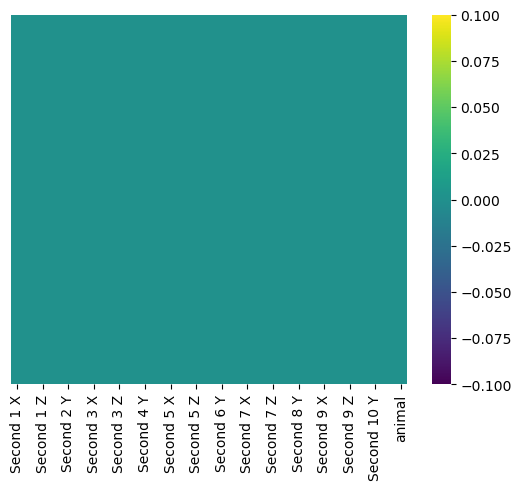

In [7]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [9]:
data['animal'].value_counts()

Elephant     67
Wild_Boar    45
Deer         37
Name: animal, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Second 1 X   149 non-null    float64
 1   Second 1 Y   149 non-null    float64
 2   Second 1 Z   149 non-null    float64
 3   Second 2 X   149 non-null    float64
 4   Second 2 Y   149 non-null    float64
 5   Second 2 Z   149 non-null    float64
 6   Second 3 X   149 non-null    float64
 7   Second 3 Y   149 non-null    float64
 8   Second 3 Z   149 non-null    float64
 9   Second 4 X   149 non-null    float64
 10  Second 4 Y   149 non-null    float64
 11  Second 4 Z   149 non-null    float64
 12  Second 5 X   149 non-null    float64
 13  Second 5 Y   149 non-null    float64
 14  Second 5 Z   149 non-null    float64
 15  Second 6 X   149 non-null    float64
 16  Second 6 Y   149 non-null    float64
 17  Second 6 Z   149 non-null    float64
 18  Second 7 X   149 non-null    float64
 19  Second 7

In [11]:
X = data.drop('animal', axis=1)
y = data['animal']

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [13]:
def model_score(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' | ' +str(acc))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model_score(knn)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
model_score(logreg)

from sklearn.svm import SVC
svm = SVC()
model_score(svm)

KNeighborsClassifier(n_neighbors=3) | 0.7555555555555555
LogisticRegression(max_iter=1000) | 0.6666666666666666
SVC() | 0.8666666666666667


In [15]:
import pickle

pickle.dump(svm, open("motion_model.dat", "wb"))

In [16]:
predict=svm.predict(X_test)

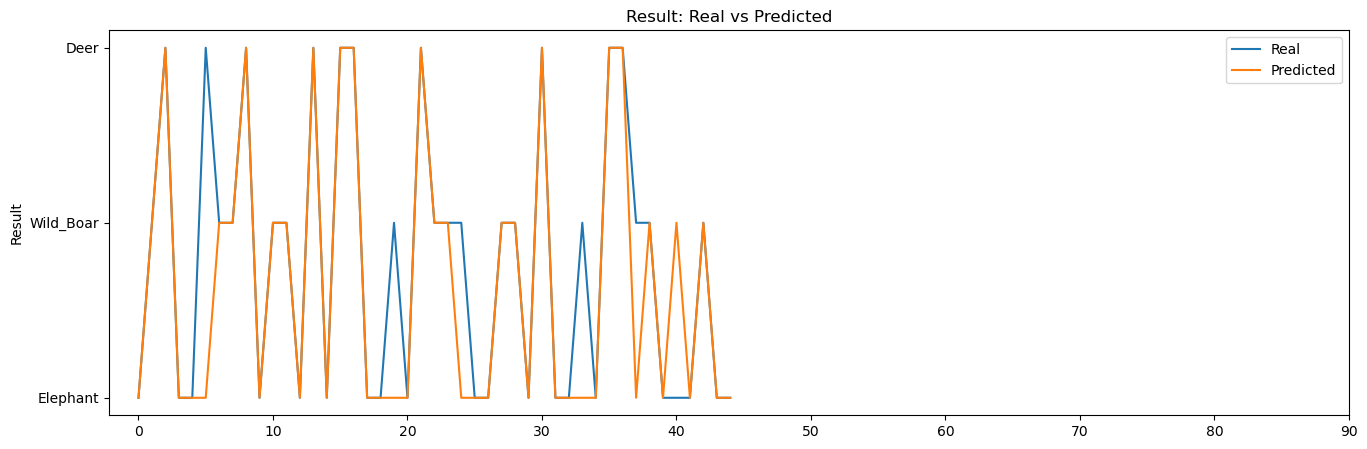

In [21]:
A = np.array(y_test)
B = predict

plt.rcParams['figure.figsize'] = 16, 5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Result: Real vs Predicted")
plt.ylabel("Result")

plt.xticks(np.arange(0, 100, 10))

plt.show()

In [22]:
with open('motion_model.dat' , 'rb') as f:
    model = pickle.load(f)

In [23]:
model.predict([[-0.634463,9.023746,-3.019088,-1.204283,9.153033,-1.968034,-0.251391,9.591172,-0.634463,9.023746,-3.019088,-1.204283,9.153033,-1.968034,-0.251391,9.591172,-2.185906,0.162806,2.454057,-3.375824,-0.548272,-2.185906,0.162806,2.454057,3.773262,4.639963,-2.932897,7.862558,-3.375824,-0.548272]])

C:\Users\Kalana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Elephant'], dtype=object)